In [4]:
#load libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('employee.csv')
#copy the data to another df
empdf = data.copy()

In [6]:
#describe
empdf.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
#info
empdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [21]:
#look over shape of data
empdf.shape

(1470, 35)

In [22]:
#look at sample of data
empdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
empdf.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [23]:
#let's see what data types how many features we are having
empdf.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [24]:
empdf['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [26]:
# let's see the total Missing values in dataset
empdf.isnull().sum().sum()

0

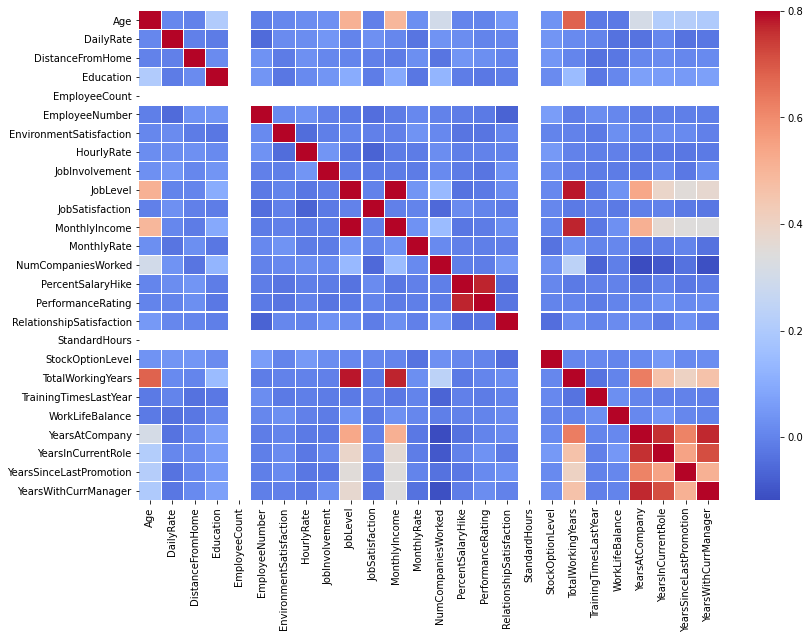

In [27]:
plt.figure(figsize=(13,9))
sns.heatmap(empdf.corr(),vmax=0.8,linewidth=0.1,cmap='coolwarm')
plt.show()

# EDA

In [28]:
categorical_features = empdf.select_dtypes(include=[np.object]).columns
print("total categorical_features",len(categorical_features))

total categorical_features 9


In [29]:
empdf[categorical_features].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [30]:
# Business Travel
empdf['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

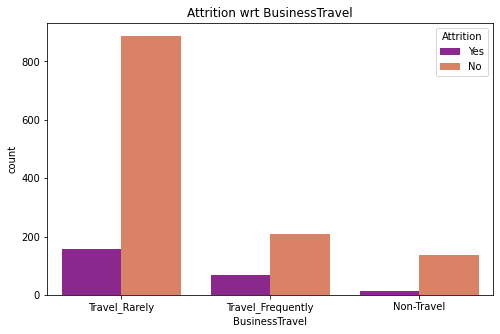

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x='BusinessTravel',hue='Attrition', data=empdf, palette='plasma')
plt.title("Attrition wrt BusinessTravel")
plt.show()

In [33]:
#Department
empdf['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

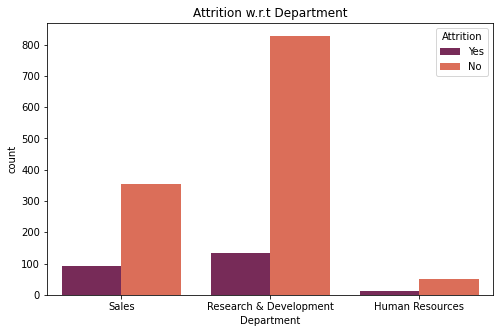

In [34]:
# Department wrt Attrition
plt.figure(figsize=(8,5))
sns.countplot(x='Department',hue='Attrition', data=empdf, palette='rocket')
plt.title("Attrition w.r.t Department")
plt.show()

In [35]:
#EducationField
empdf['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

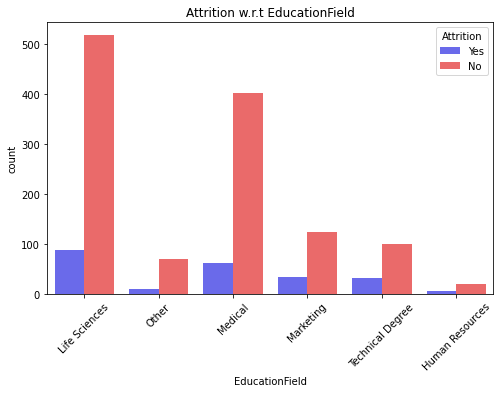

In [36]:
# Department wrt Attrition
plt.figure(figsize=(8,5))
sns.countplot(x='EducationField',hue='Attrition', data=empdf, palette='seismic')
plt.title("Attrition w.r.t EducationField")
plt.xticks(rotation=45)
plt.show()

In [37]:
#Gender
empdf['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

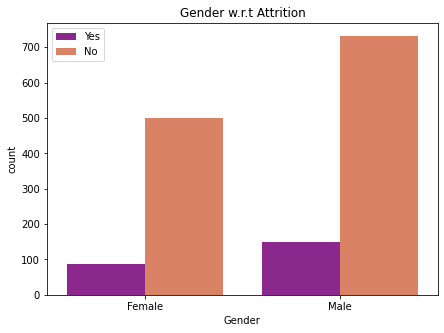

In [38]:
# most male of female employes Attriate
# Department wrt Attrition
plt.figure(figsize=(7,5))
sns.countplot(x='Gender',hue='Attrition', data=empdf, palette='plasma')
plt.title("Gender w.r.t Attrition")
plt.legend(loc='best')
plt.show()

In [39]:
# let's also see, how any male and female are Married
pd.crosstab(empdf['MaritalStatus'],empdf['Gender'])

Gender,Female,Male
MaritalStatus,,
Divorced,117,210
Married,272,401
Single,199,271


In [40]:
#JobRole
empdf['JobRole'].nunique()

9

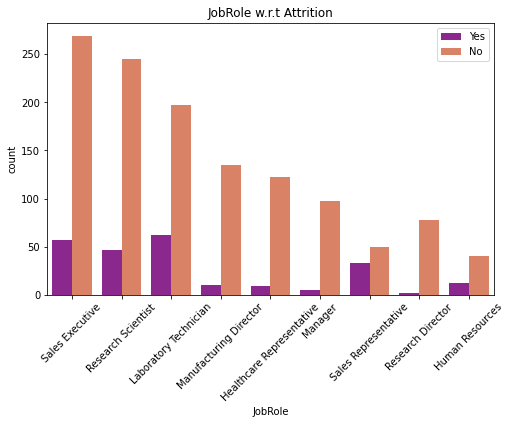

In [41]:
# let's see at which post most people are leaving the jobs
# JobRole
plt.figure(figsize=(8,5))
sns.countplot(x='JobRole',hue='Attrition', data=empdf, palette='plasma')
plt.title("JobRole w.r.t Attrition")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

In [42]:
#OverTime
empdf['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

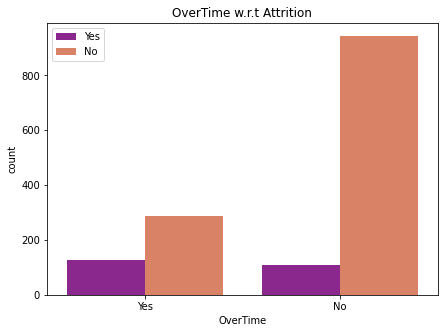

In [43]:
plt.figure(figsize=(7,5))
sns.countplot(x='OverTime',hue='Attrition', data=empdf, palette='plasma')
plt.title("OverTime w.r.t Attrition")
plt.legend(loc='best')
plt.show()

In [44]:
# how many male and female do overTime
pd.crosstab(empdf['OverTime'], empdf['Gender'])

Gender,Female,Male
OverTime,,
No,408,646
Yes,180,236


In [45]:
numerical_features = [feature for feature in empdf.columns if empdf[feature].dtype != 'O']
print("Total numerical_features", len(numerical_features))

Total numerical_features 26


In [46]:
empdf[numerical_features].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


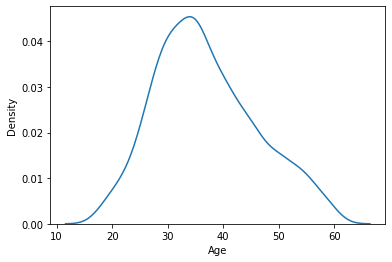

In [47]:
# distribution of age
sns.distplot(empdf['Age'],hist=False)
plt.show()

In [48]:
empdf['Age'].nunique()

43

In [49]:
ordinal_features = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
empdf[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


In [50]:
# Education
empdf['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

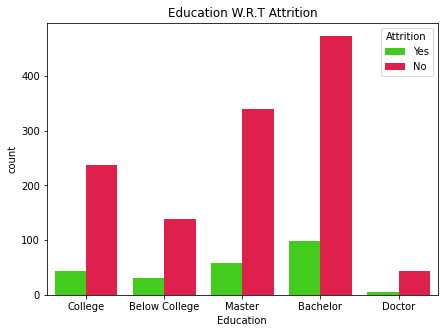

In [51]:
edu_map = {1 :'Below College', 2: 'College', 3 :'Bachelor', 4 :'Master', 5: 'Doctor'}
plt.figure(figsize=(7,5))
sns.countplot(x=empdf['Education'].map(edu_map), hue='Attrition', data=empdf, palette='prism')
plt.title("Education W.R.T Attrition")
plt.show()

In [52]:
#EnvironmentSatisfaction
empdf['EnvironmentSatisfaction'].value_counts()   # it is very nice response from employees

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [53]:
#JobInvolvement
empdf['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [54]:
numerical_features = [feature for feature in empdf.columns if empdf[feature].dtype != 'O' and feature not in ordinal_features]
print("total numerical_features",len(numerical_features))

total numerical_features 19


In [55]:
empdf[numerical_features].head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,1,94,2,5993,19479,8,11,80,0,8,0,6,4,0,5
1,49,279,8,1,2,61,2,5130,24907,1,23,80,1,10,3,10,7,1,7
2,37,1373,2,1,4,92,1,2090,2396,6,15,80,0,7,3,0,0,0,0
3,33,1392,3,1,5,56,1,2909,23159,1,11,80,0,8,3,8,7,3,0
4,27,591,2,1,7,40,1,3468,16632,9,12,80,1,6,3,2,2,2,2


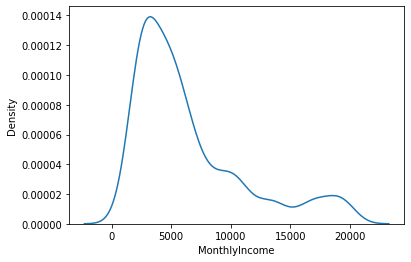

In [56]:
#MonthlyIncome
sns.distplot(empdf['MonthlyIncome'],hist=False)
plt.show()

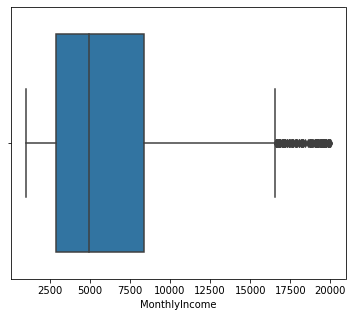

In [57]:
plt.figure(figsize=(6,5))
sns.boxplot(empdf['MonthlyIncome'])
plt.show()

In [59]:
# employee count in age group and whicg age employees are more
empdf.groupby('Age')['EmployeeCount'].sum().sort_values(ascending=False).head()

Age
35    78
34    77
36    69
31    69
29    68
Name: EmployeeCount, dtype: int64

In [60]:
#JobLevel
empdf['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

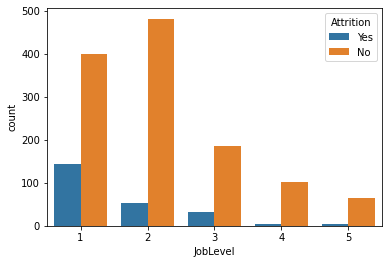

In [61]:
# JobLevel can have some effect on Attrition of Employees
sns.countplot(x='JobLevel',hue='Attrition',data=empdf)
plt.show()

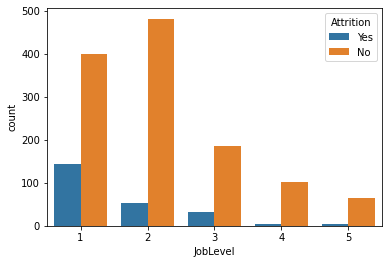

In [62]:
#NumCompaniesWorked
sns.countplot(x='JobLevel',hue='Attrition',data=empdf)
plt.show()

In [63]:
empdf['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [64]:
#drop the columns which have save val in whole dataset or which are unrelevant for Attrition prediction. 
empdf.drop(['EmployeeCount','EmployeeNumber','StandardHours'],axis=1, inplace=True)

# Categorical Encoding

In [65]:
empdf[categorical_features].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [66]:
# Target Variable(Attrition)
empdf['Attrition'] = empdf['Attrition'].replace({'No':0,'Yes':1})

In [67]:
#encode binary variables
empdf['OverTime'] = empdf['OverTime'].map({'No':0,'Yes':1})
empdf['Gender'] = empdf['Gender'].map({'Male':0,'Female':1})

In [68]:
#encode categorical columns which are ordinal, use labelEncoding
cat_cols = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
for col in cat_cols:
    map_dict = {k:i for i, k in enumerate(empdf[col].value_counts().index,0)}
    empdf[col] = empdf[col].map(map_dict)

In [69]:
# drop the Over18 column
empdf.drop('Over18',axis=1,inplace=True)

# Making a Corelation

In [70]:
empdf.corr()['Attrition'][:-1].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
Department                  0.077351
EducationField              0.062320
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
MaritalStatus               0.011195
PerformanceRating           0.002889
BusinessTravel             -0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
JobRole                    -0.027930
Gender                     -0.029453
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
Age                        -0.159205
MonthlyIncome              -0.159840
Y

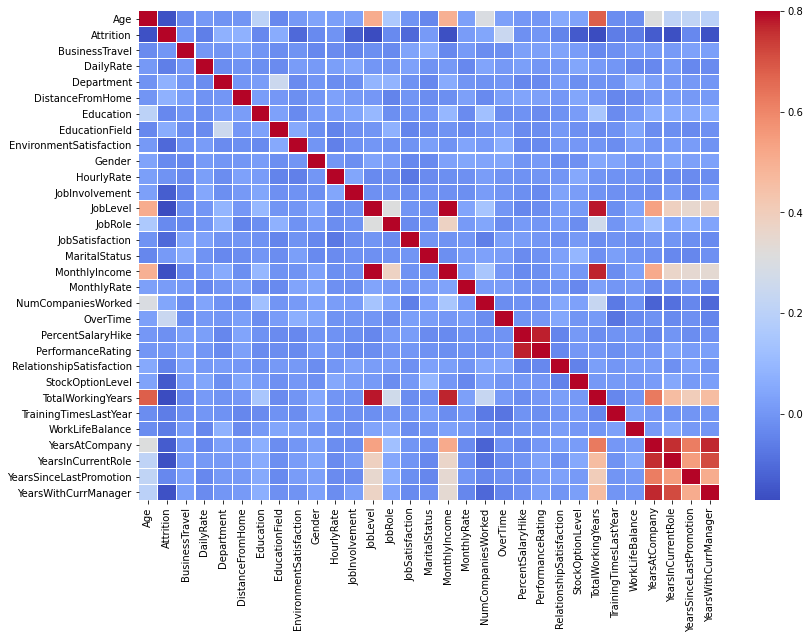

In [71]:
plt.figure(figsize=(13,9))
sns.heatmap(empdf.corr(),vmax=0.8,linewidth=0.1,cmap='coolwarm')
plt.show()

In [72]:
empdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,1,1,2,0,2,1,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,0,8,1,0,3,0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,0,1373,0,2,2,4,4,0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,0,3,4,0,4,1,...,3,3,0,8,3,3,8,7,3,0
4,27,0,0,591,0,2,1,1,1,0,...,3,4,1,6,3,3,2,2,2,2


# FeatureSelection

In [73]:
x = empdf.drop('Attrition',axis=1)
y = empdf['Attrition']

In [74]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree = ExtraTreesClassifier()

extra_tree.fit(x,y)

feat_importance = extra_tree.feature_importances_

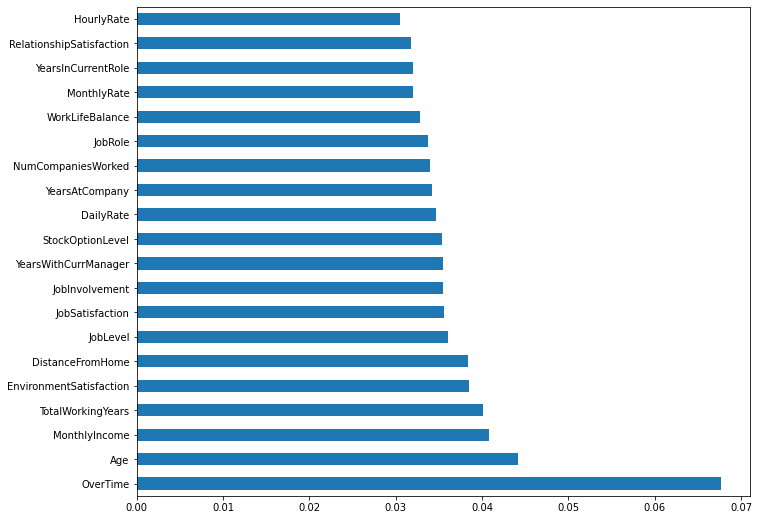

In [75]:
#plotting a feature importance
plt.figure(figsize=(11,9))
feat_imp = pd.Series(extra_tree.feature_importances_, index=x.columns)

feat_imp.nlargest(20).plot(kind='barh')
plt.show()

In [76]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

x_scaled = min_max.fit(x).transform(x)

In [77]:
ExtraTree = ExtraTreesClassifier()

ExtraTree.fit(x_scaled, y)

feature_importance = pd.Series(ExtraTree.feature_importances_, index=x.columns)
feature_importance

Age                         0.044635
BusinessTravel              0.024547
DailyRate                   0.030997
Department                  0.020527
DistanceFromHome            0.036994
Education                   0.028297
EducationField              0.031366
EnvironmentSatisfaction     0.037968
Gender                      0.021968
HourlyRate                  0.030971
JobInvolvement              0.035982
JobLevel                    0.036885
JobRole                     0.034096
JobSatisfaction             0.036687
MaritalStatus               0.028563
MonthlyIncome               0.041360
MonthlyRate                 0.029746
NumCompaniesWorked          0.032733
OverTime                    0.070206
PercentSalaryHike           0.031200
PerformanceRating           0.011288
RelationshipSatisfaction    0.033064
StockOptionLevel            0.035489
TotalWorkingYears           0.039922
TrainingTimesLastYear       0.029589
WorkLifeBalance             0.034983
YearsAtCompany              0.033832
Y

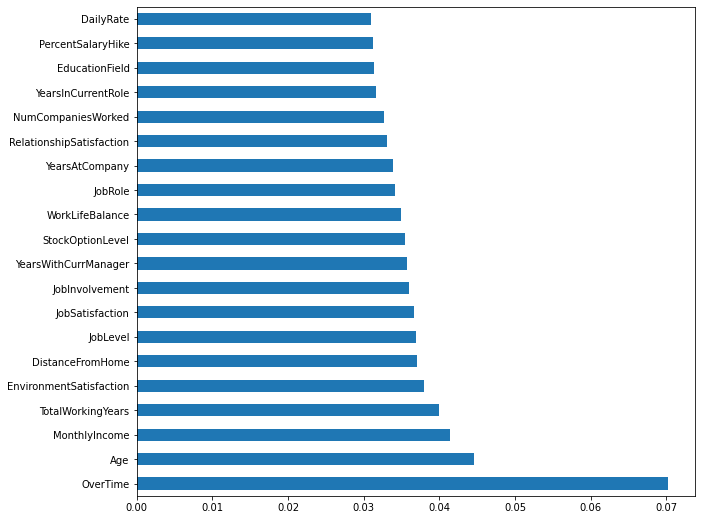

In [78]:
plt.figure(figsize=(10,9))
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

# Modelling

In [79]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, classification_report

In [80]:
#split data into train and test set.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training shape: ",x_train.shape)
print("testing shape: ",x_test.shape)

training shape:  (1102, 30)
testing shape:  (368, 30)


In [81]:
#models
log_clf = LogisticRegression()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

In [82]:
# first check the accuracy score on without scalled features
for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf]:
    clf.fit(x_train, y_train)
    
    pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))

LogisticRegression   0.8722826086956522
SVC   0.8695652173913043
KNeighborsClassifier   0.8396739130434783
DecisionTreeClassifier   0.7907608695652174
RandomForestClassifier   0.875


In [83]:
# let's try out VotingClassifier
from sklearn.ensemble import VotingClassifier

voting_clf =VotingClassifier([('lgclf',log_clf),('svc',svc_clf),('knn',knn_clf),('dt',dt_clf),('rf',rf_clf)])

voting_clf.fit(x_train,y_train)

y_pred = voting_clf.predict(x_test)
print("acuracy: ",accuracy_score(y_test,y_pred))

acuracy:  0.8668478260869565


In [84]:
# if we do same thing on scaled features
#split data into train and test set using scaled data.
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled = train_test_split(x_scaled,y,test_size=0.25,random_state=42)
print("training shape: ",x_train_scaled.shape)
print("testing shape: ",x_test_scaled.shape)

training shape:  (1102, 30)
testing shape:  (368, 30)


In [85]:
# Now check the accuracy score on scalled features
for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf]:
    clf.fit(x_train_scaled, y_train_scaled)
    
    pred = clf.predict(x_test_scaled)
    
    print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))

LogisticRegression   0.904891304347826
SVC   0.8831521739130435
KNeighborsClassifier   0.875
DecisionTreeClassifier   0.7934782608695652
RandomForestClassifier   0.875


In [86]:
# try votingClf with scaled data

voting_clf =VotingClassifier([('lgclf',log_clf),('svc',svc_clf),('knn',knn_clf),('dt',dt_clf),('rf',rf_clf)])

voting_clf.fit(x_train_scaled,y_train_scaled)

y_pred = voting_clf.predict(x_test_scaled)
print("acuracy: ",accuracy_score(y_test_scaled,y_pred))

acuracy:  0.8940217391304348
